In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [3]:
def file_read_authors():
    df = pd.read_json('./Dataset/goodreads_book_authors.json', lines=True)
    df.rename(columns={'average_rating': 'author_avg_rating', 'author_id': 'authors', 'text_reviews_count': 'aut_txt_rev_count','name': 'author_name', 'ratings_count': 'author_ratings_count'}, inplace=True)
    return df


def file_read(genre):
    df = pd.read_json('./Dataset/goodreads_books_'+ genre +'.json', lines=True)
    df.drop(columns=['isbn', 'series','language_code', 'country_code', 'kindle_asin', 'popular_shelves','similar_books','asin', 'is_ebook', 'edition_information', 'publication_year', 'url', 'image_url', 'format', 'link', 'publisher', 'publication_day', 'isbn13', 'publication_month', 'work_id'], inplace=True)
    return df

def fix_author(df):
    '''Extracts the author id from the disctionary of authors'''
    for index in df.index:
        if len(df['authors'][index]) >=1:
            author_id = df['authors'][index][0]['author_id']
            df['authors'][index] = int(author_id)


def add_author_name(df, aut):
    '''adds author's name to df'''
    foo = df.merge(aut[['author_name','authors']], on = 'authors', how = 'left')
    return foo

In [4]:
# init authors df
df_authors = file_read_authors()

# init individual genre dfs and add another column with genre:
df_children = file_read('children')
df_children['genre'] = 'children'

df_comics = file_read('comics_graphic')
df_comics['genre'] = 'comics'

df_history = file_read('history_biography')
df_history['genre'] = 'history'

df_mystery = file_read('mystery_thriller_crime')
df_mystery['genre'] = 'mystery'

df_poetry = file_read('poetry')
df_poetry['genre'] = 'poetry'

df_adult = file_read('young_adult')
df_adult['genre'] = 'young_adult'

df_romance = file_read('romance')
df_romance['genre'] = 'romance'

df_fantasy = file_read('fantasy_paranormal')
df_fantasy['genre'] = 'fantasy'

In [5]:
# process each df
dfs = [df_children, df_comics, df_history, df_mystery, df_poetry, df_adult, df_romance, df_fantasy]
for d in dfs:
    fix_author(d)

/var/folders/5h/l2b3kn4j69bgsb2rqd8vqlw00000gn/T/ipykernel_17018/533316467.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['authors'][index] = int(author_id)


There are books in fantasy dataset that don't have author id: 
On the descriptopn on goodreads it says that "Fantasy about the work of grandmaster H. Warner Munn." So we'll use his last name for the reference. 
For the second one: Christopher Krovatin is the first uthor of the book with the name "Best ghost stories"

In [6]:
df_fantasy[df_fantasy['authors'].isin(df_authors['authors'])== False]

,text_reviews_count,average_rating,description,authors,num_pages,book_id,ratings_count,title,title_without_series,genre
72992,1,3.89,,[],,7520314,1,The Werewolf of Plonkert,The Werewolf of Plonkert,fantasy
211618,1,3.04,,[],,11696786,76,The Best Ghost Stories,The Best Ghost Stories,fantasy


In [7]:
# Find his author ID:
df_authors[df_authors['author_name'] == 'H. Warner Munn']

,author_avg_rating,authors,aut_txt_rev_count,author_name,author_ratings_count
552760,3.59,14422609,35,H. Warner Munn,395


In [8]:
# Find author ID for the second book:
df_authors[df_authors['author_name'] == 'Christopher Krovatin']

,author_avg_rating,authors,aut_txt_rev_count,author_name,author_ratings_count
51094,3.86,85088,382,Christopher Krovatin,3094


In [9]:
# Assign these author ids to the missing cells: 
df_fantasy['authors'][72992] = 14422609
df_fantasy['authors'][211618] = 85088

/var/folders/5h/l2b3kn4j69bgsb2rqd8vqlw00000gn/T/ipykernel_17018/28704132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fantasy['authors'][72992] = 14422609
/var/folders/5h/l2b3kn4j69bgsb2rqd8vqlw00000gn/T/ipykernel_17018/28704132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fantasy['authors'][211618] = 85088


In [10]:
# Add author's name to each df:

df_children = add_author_name(df_children, df_authors)
df_comics = add_author_name(df_comics, df_authors)
df_history = add_author_name(df_history, df_authors)
df_mystery = add_author_name(df_mystery, df_authors)
df_poetry = add_author_name(df_poetry, df_authors)
df_adult = add_author_name(df_adult, df_authors)
df_romance = add_author_name(df_romance, df_authors)
df_fantasy = add_author_name(df_fantasy, df_authors)

dfs = [df_children, df_comics, df_history, df_mystery, df_poetry, df_adult, df_romance, df_fantasy]

In [11]:
# Check if the df is now correct:  
df_fantasy.head(2)

,text_reviews_count,average_rating,description,authors,num_pages,book_id,ratings_count,title,title_without_series,genre,author_name
0,7,4.03,Omnibus book club edition containing the Ladie...,10333,600,7327624,140,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ...",fantasy,Barbara Hambly
1,6,4.22,"To Kara's astonishment, she discovers that a p...",19158,216,6066812,98,All's Fairy in Love and War (Avalon: Web of Ma...,All's Fairy in Love and War (Avalon: Web of Ma...,fantasy,Rachel Roberts


In [12]:
#save all dataframes to csv:   
for d in dfs:
   d.to_csv(path_or_buf='./Dataset/'+d['genre'].iloc[0]+'.csv', index = False) 

---

### EDA

Top rated books:

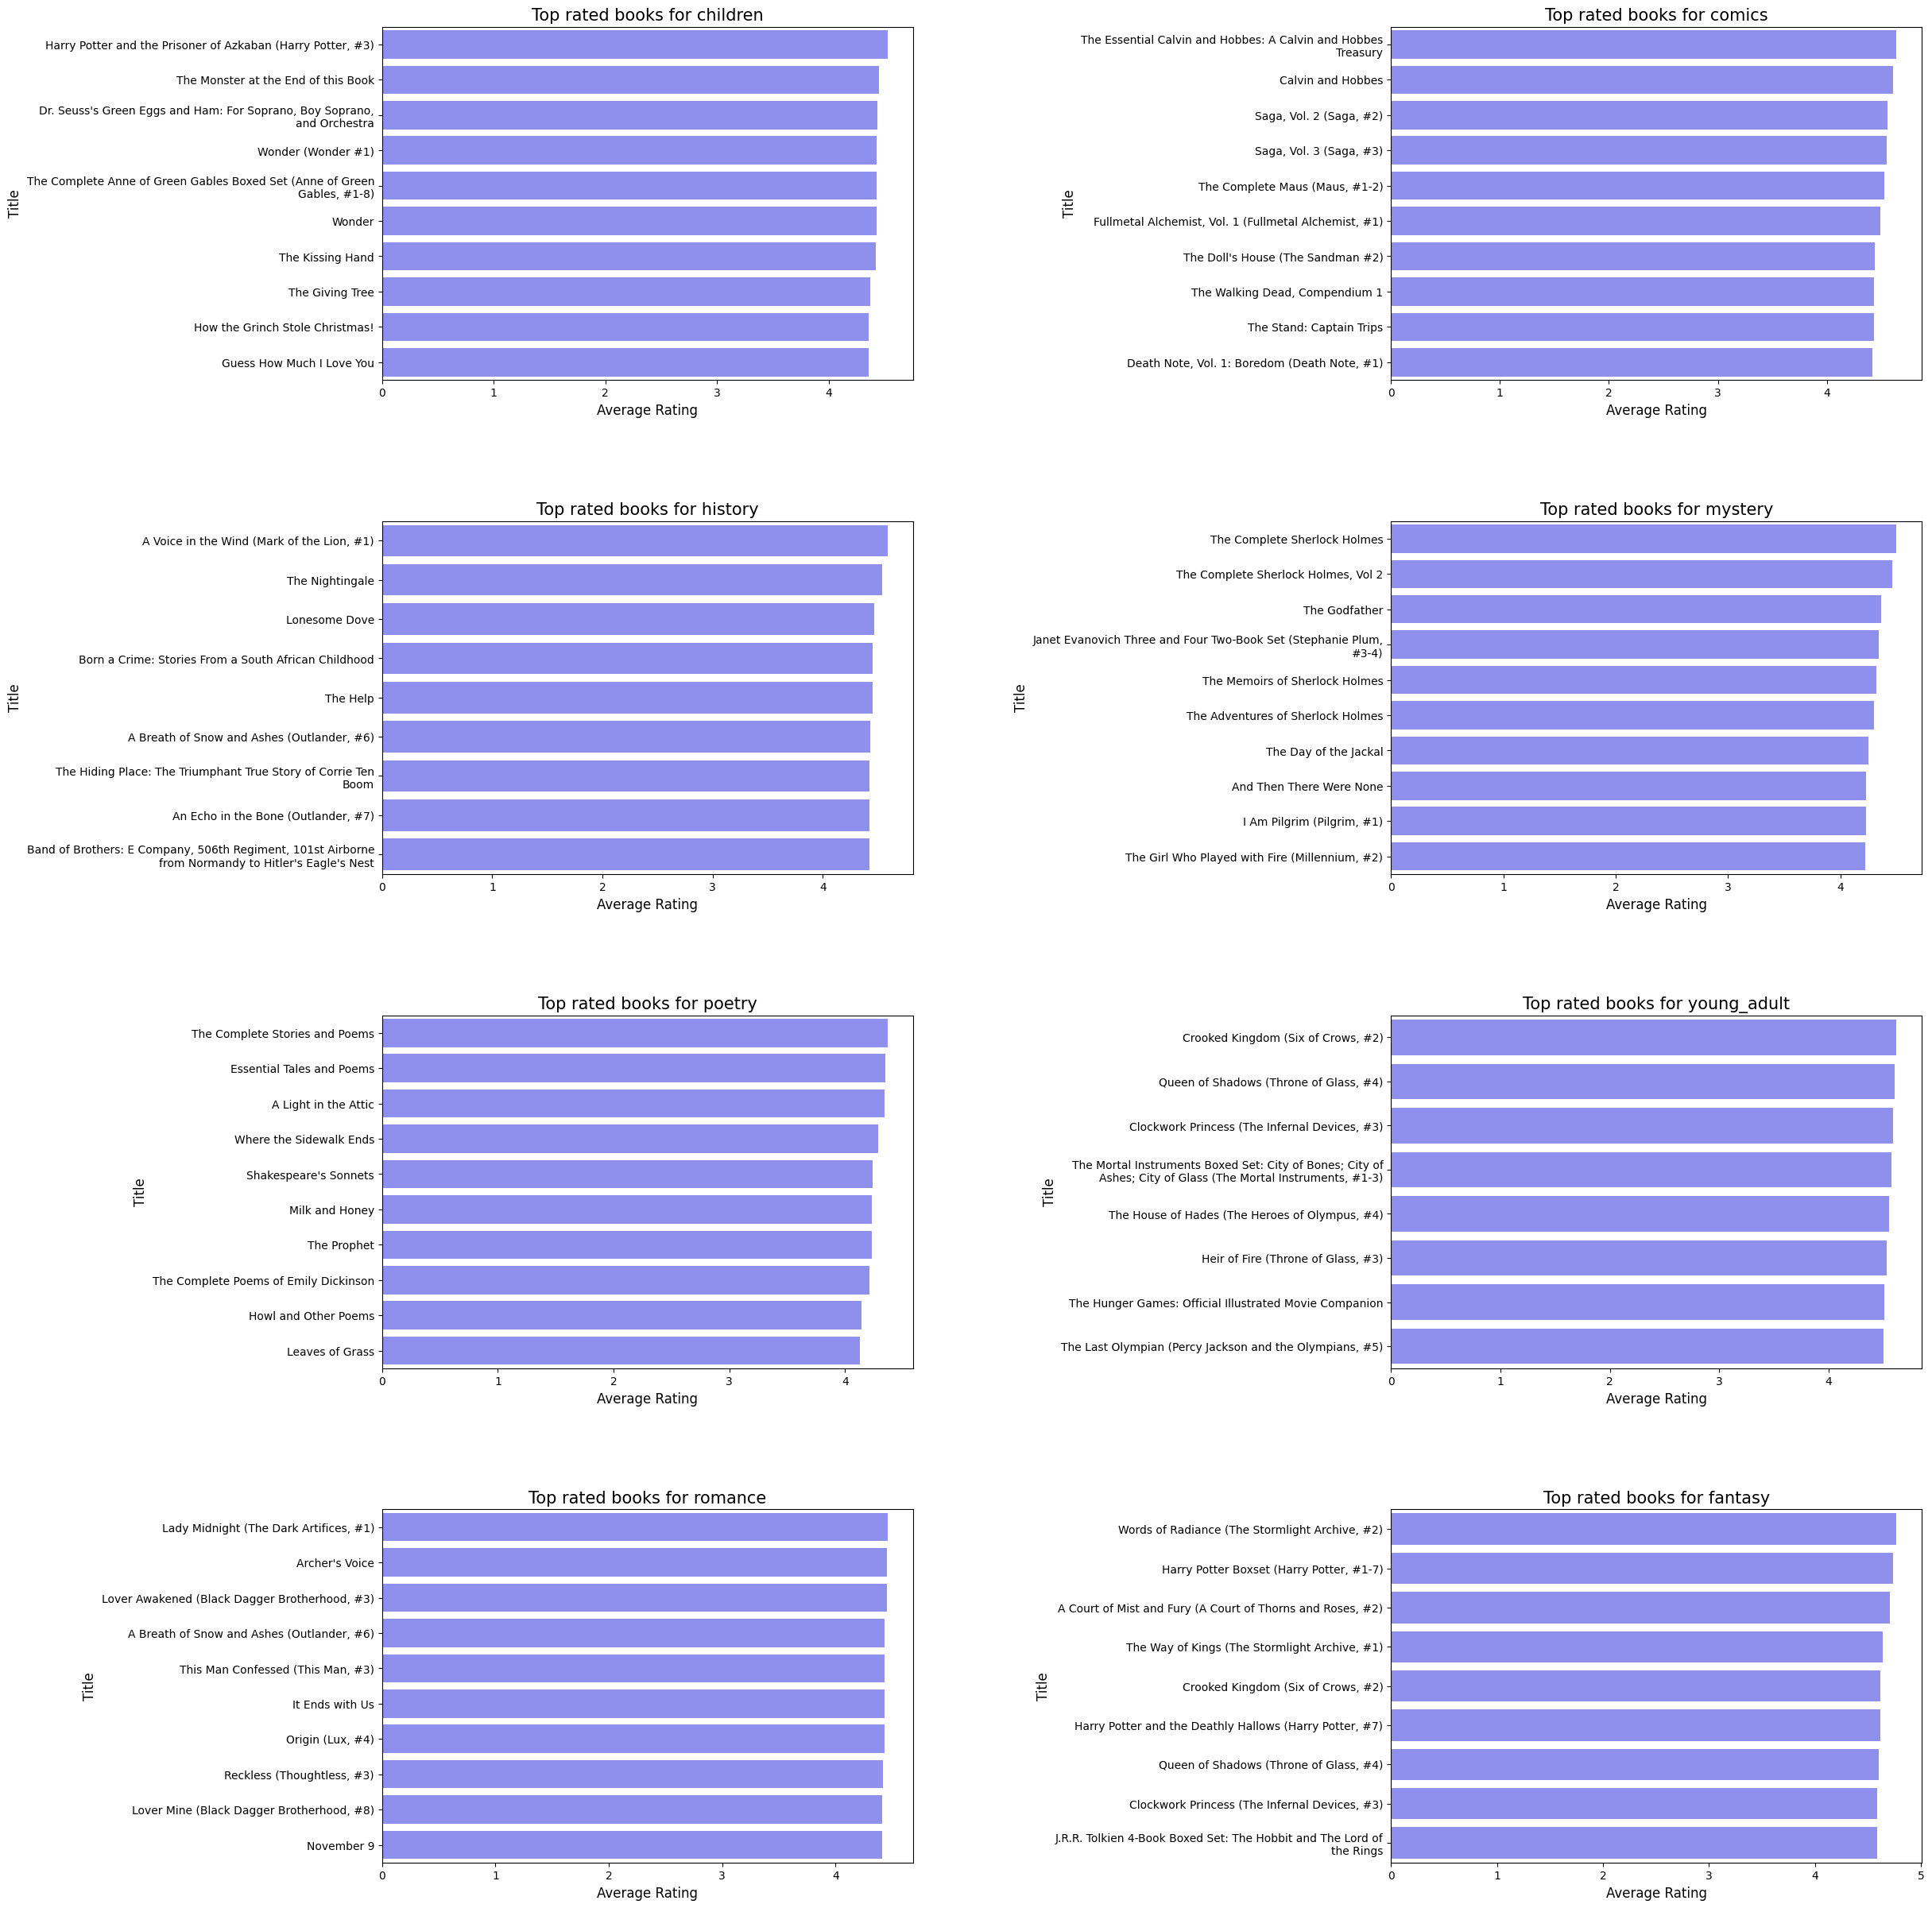

In [13]:
def plot_top_rated_books(df_books):
    all_top_books = []
    
    # Get the most rated books:
    for df in df_books:
        top_books = df[df['ratings_count'] > 50000]
        top_books = top_books.sort_values(by='average_rating', ascending=False).head(10)
        all_top_books.append(top_books)

    '''Plots the top books'''
    rows = 4
    cols = 2
    
    f, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (25, 30))
    plt.subplots_adjust(hspace = 0.4, wspace = 0.9)
    
    count = 0
    for r in range(rows):
        for c in range(cols):
            kwargs = {'alpha':0.5}
            ax = sns.barplot(x = all_top_books[count]["average_rating"], y = all_top_books[count]['title'], data = all_top_books[count], color = 'blue', ax = axs[r,c], **kwargs)
            axs[r,c].set_title('Top rated books for ' + df_books[count]['genre'].iloc[0], fontsize = 15)
            axs[r,c].set_xlabel('Average Rating', fontsize = 12) 
            axs[r,c].set_ylabel('Title', fontsize = 12) 

            labels = [textwrap.fill(label.get_text(), 60) for label in ax.get_yticklabels()]
            ax.set_yticklabels(labels)
            count += 1
       
    plt.savefig(f"./resources/top_rated_books.jpg", bbox_inches="tight")
    plt.show();

plot_top_rated_books(dfs) 

In [14]:
all_top_books = []
# Get the most rated books:
for df in dfs:
    top_books = df[df['ratings_count'] > 50000]
    top_books = top_books.sort_values(by='average_rating', ascending=False).head(1)
    all_top_books.append(top_books)
pd.concat(all_top_books)[['genre','title']]

,genre,title
53726,children,Harry Potter and the Prisoner of Azkaban (Harr...
15349,comics,The Essential Calvin and Hobbes: A Calvin and ...
298168,history,"A Voice in the Wind (Mark of the Lion, #1)"
21637,mystery,The Complete Sherlock Holmes
35813,poetry,The Complete Stories and Poems
59700,young_adult,"Crooked Kingdom (Six of Crows, #2)"
66149,romance,"Lady Midnight (The Dark Artifices, #1)"
42064,fantasy,"Words of Radiance (The Stormlight Archive, #2)"


Most reviwed Books:

In [15]:
def plot_top_text_books(df_books):
    all_top_books = []
    
    # Get the most reviewed books:
    for df in df_books:
        most_text_reviews = df.sort_values('text_reviews_count',ascending=False).head(10)
        all_top_books.append(most_text_reviews)

    '''Plots the top books'''
    rows = 4
    cols = 2
    
    f, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (20, 20))
    plt.subplots_adjust(hspace = 0.4, wspace = 0.9)
    
    count = 0
    for r in range(rows):
        for c in range(cols):
            kwargs = {'alpha':0.5}
            ax = sns.barplot(x = all_top_books[count]["text_reviews_count"], y = all_top_books[count]['title'], data = all_top_books[count], ax = axs[r,c], color = 'green', **kwargs)
            axs[r,c].set_title('Books with most text reviews in ' + df_books[count]['genre'].iloc[0], fontsize = 15)
            axs[r,c].set_xlabel('Text reviews', fontsize = 12) 
            axs[r,c].set_ylabel('Title', fontsize = 12) 

            labels = [textwrap.fill(label.get_text(), 60) for label in ax.get_yticklabels()]
            ax.set_yticklabels(labels)
            count += 1
    plt.savefig(f"./resources/top_text_books.jpg", bbox_inches="tight")
    plt.show()

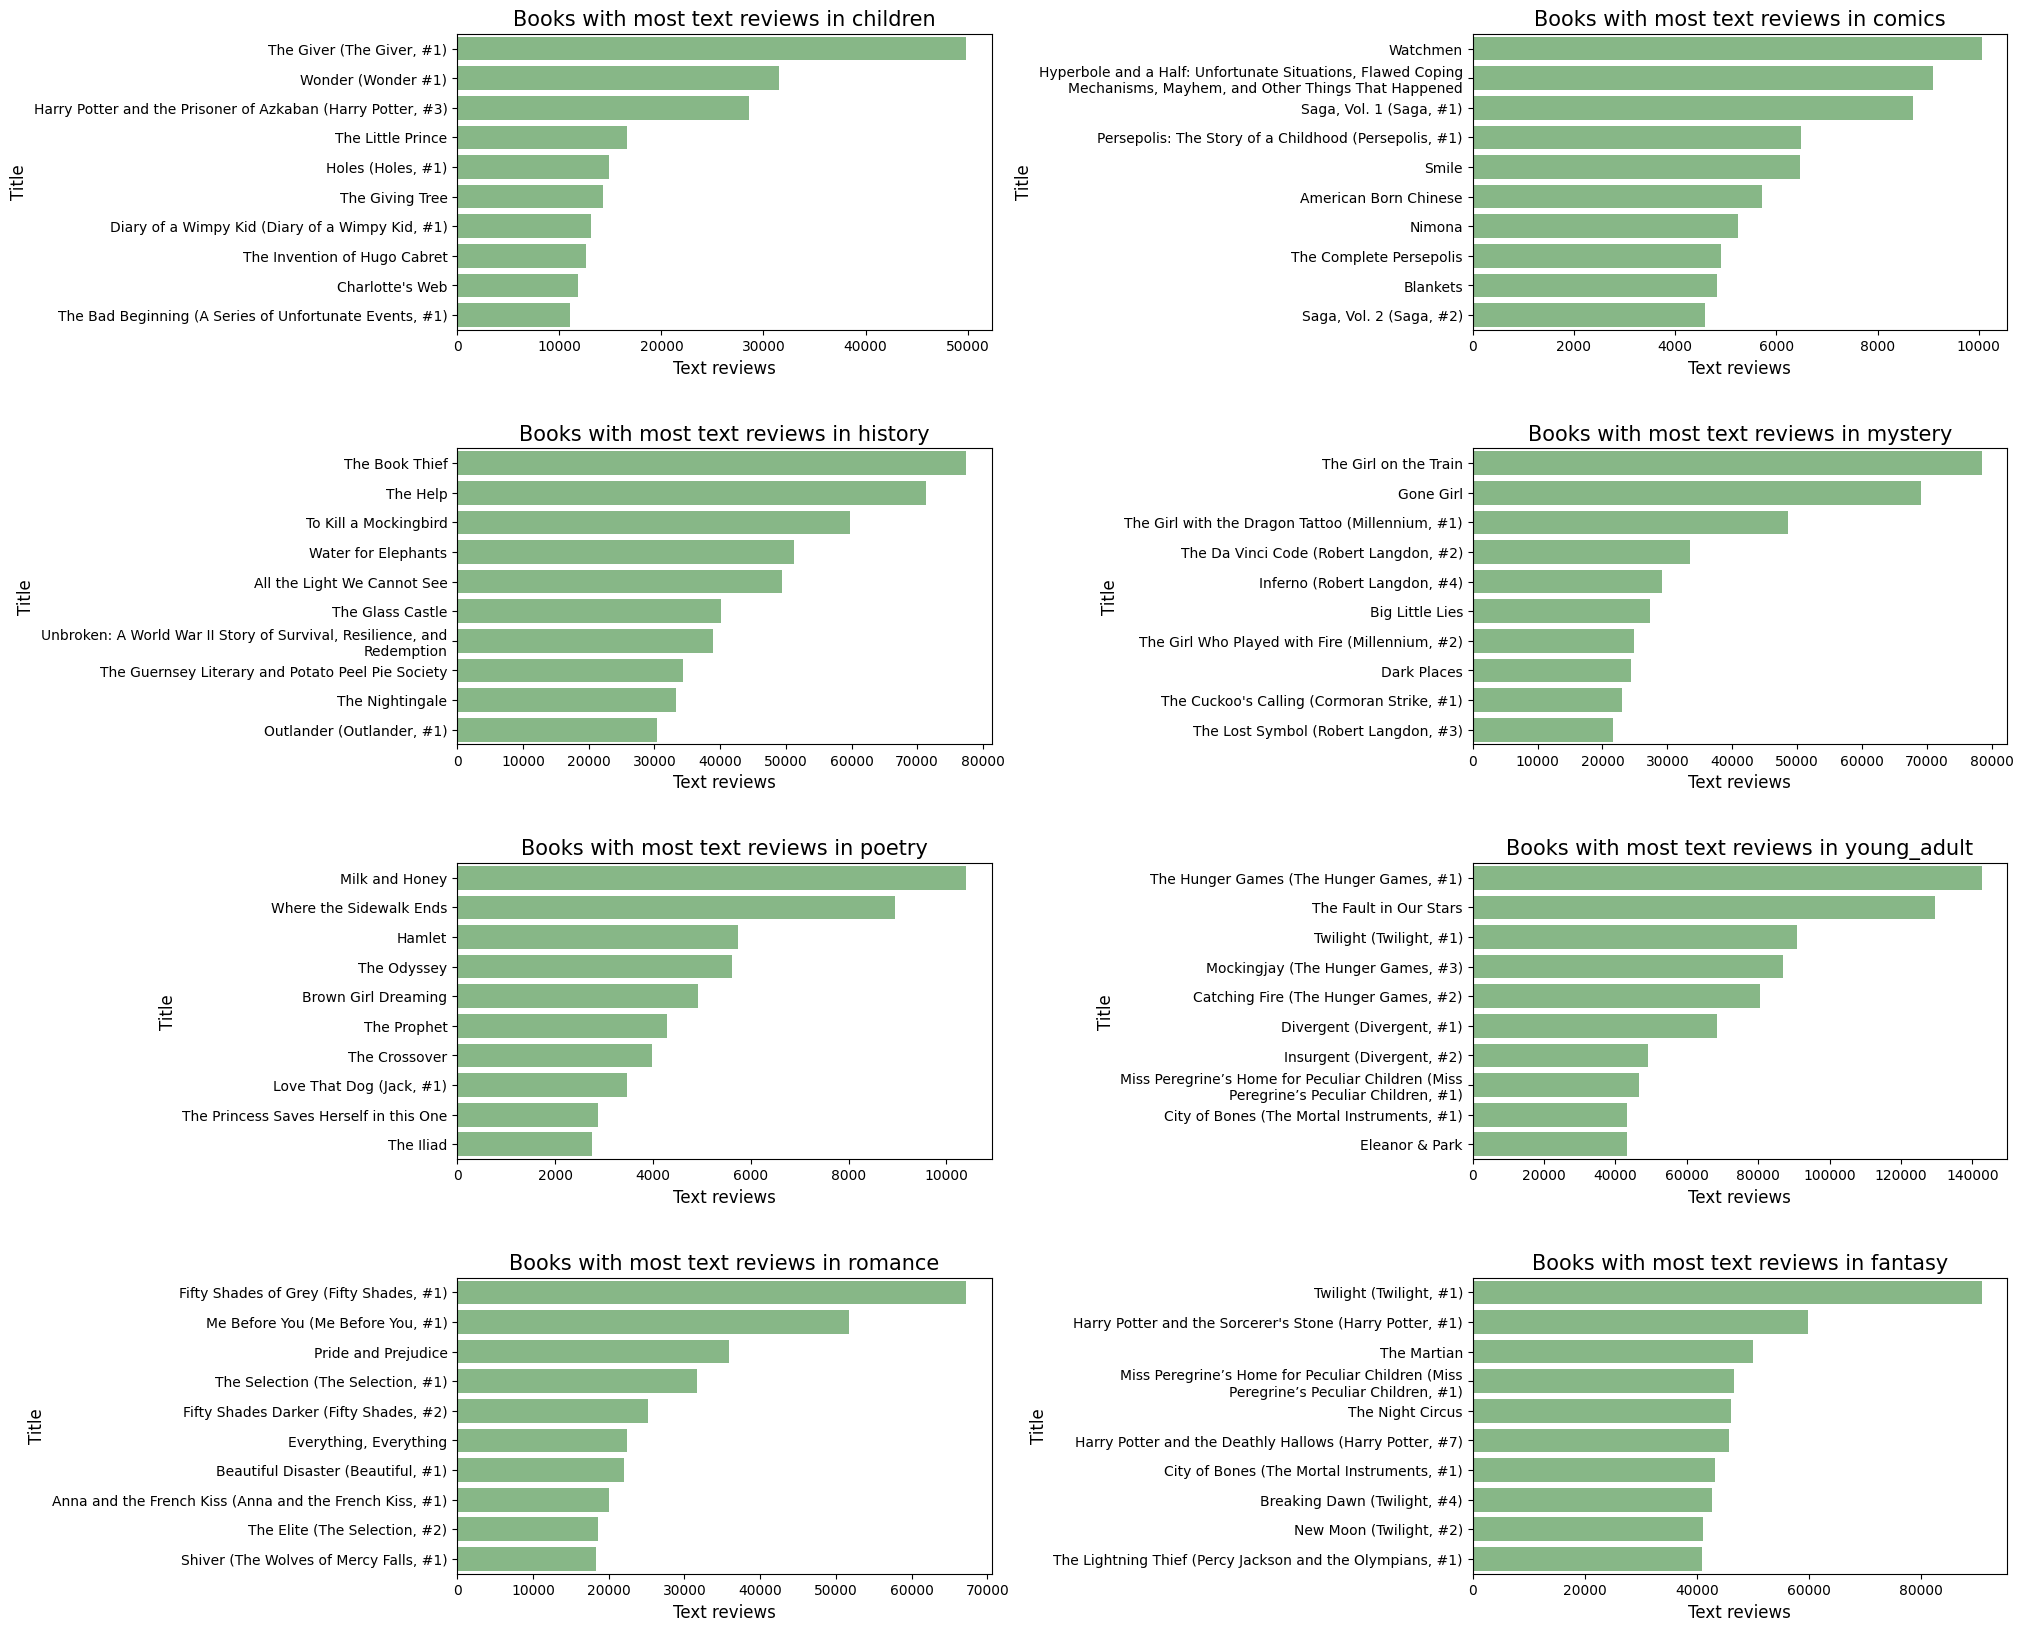

In [16]:
plot_top_text_books(dfs)

In [17]:
all_top_text_books = []
# Get the most reviewed books:
for df in dfs:
    most_text_reviews = df.sort_values('text_reviews_count',ascending=False).head(1)
    all_top_text_books.append(most_text_reviews)
pd.concat(all_top_text_books)[['genre','title']]

,genre,title
110278,children,"The Giver (The Giver, #1)"
2749,comics,Watchmen
86457,history,The Book Thief
182655,mystery,The Girl on the Train
10237,poetry,Milk and Honey
20364,young_adult,"The Hunger Games (The Hunger Games, #1)"
40445,romance,"Fifty Shades of Grey (Fifty Shades, #1)"
63913,fantasy,"Twilight (Twilight, #1)"


Top voted books

In [18]:
def plot_top_vote_books(df_books):
    all_top_books = []
    
    # Get the most voted books:
    for df in df_books:
        top_vote = df.sort_values(by='ratings_count', ascending=False).head(10)
        all_top_books.append(top_vote)

    '''Plots the top books'''
    rows = 4
    cols = 2
    
    f, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (20, 20))
    plt.subplots_adjust(hspace = 0.4, wspace = 0.9)
    
    count = 0
    for r in range(rows):
        for c in range(cols):
            kwargs = {'alpha':0.5}
            ax = sns.barplot(x = all_top_books[count]["ratings_count"], y = all_top_books[count]['title'], data = all_top_books[count], ax = axs[r,c], **kwargs, color='purple')
            axs[r,c].set_title('Top voted books in ' + df_books[count]['genre'].iloc[0], fontsize = 15)
            axs[r,c].set_xlabel('Ratings count', fontsize = 12) 
            axs[r,c].set_ylabel('Title', fontsize = 12) 

            labels = [textwrap.fill(label.get_text(), 60) for label in ax.get_yticklabels()]
            ax.set_yticklabels(labels)
             
            count += 1
    plt.savefig(f"./resources/top_voted_books.jpg", bbox_inches="tight")
    plt.show()

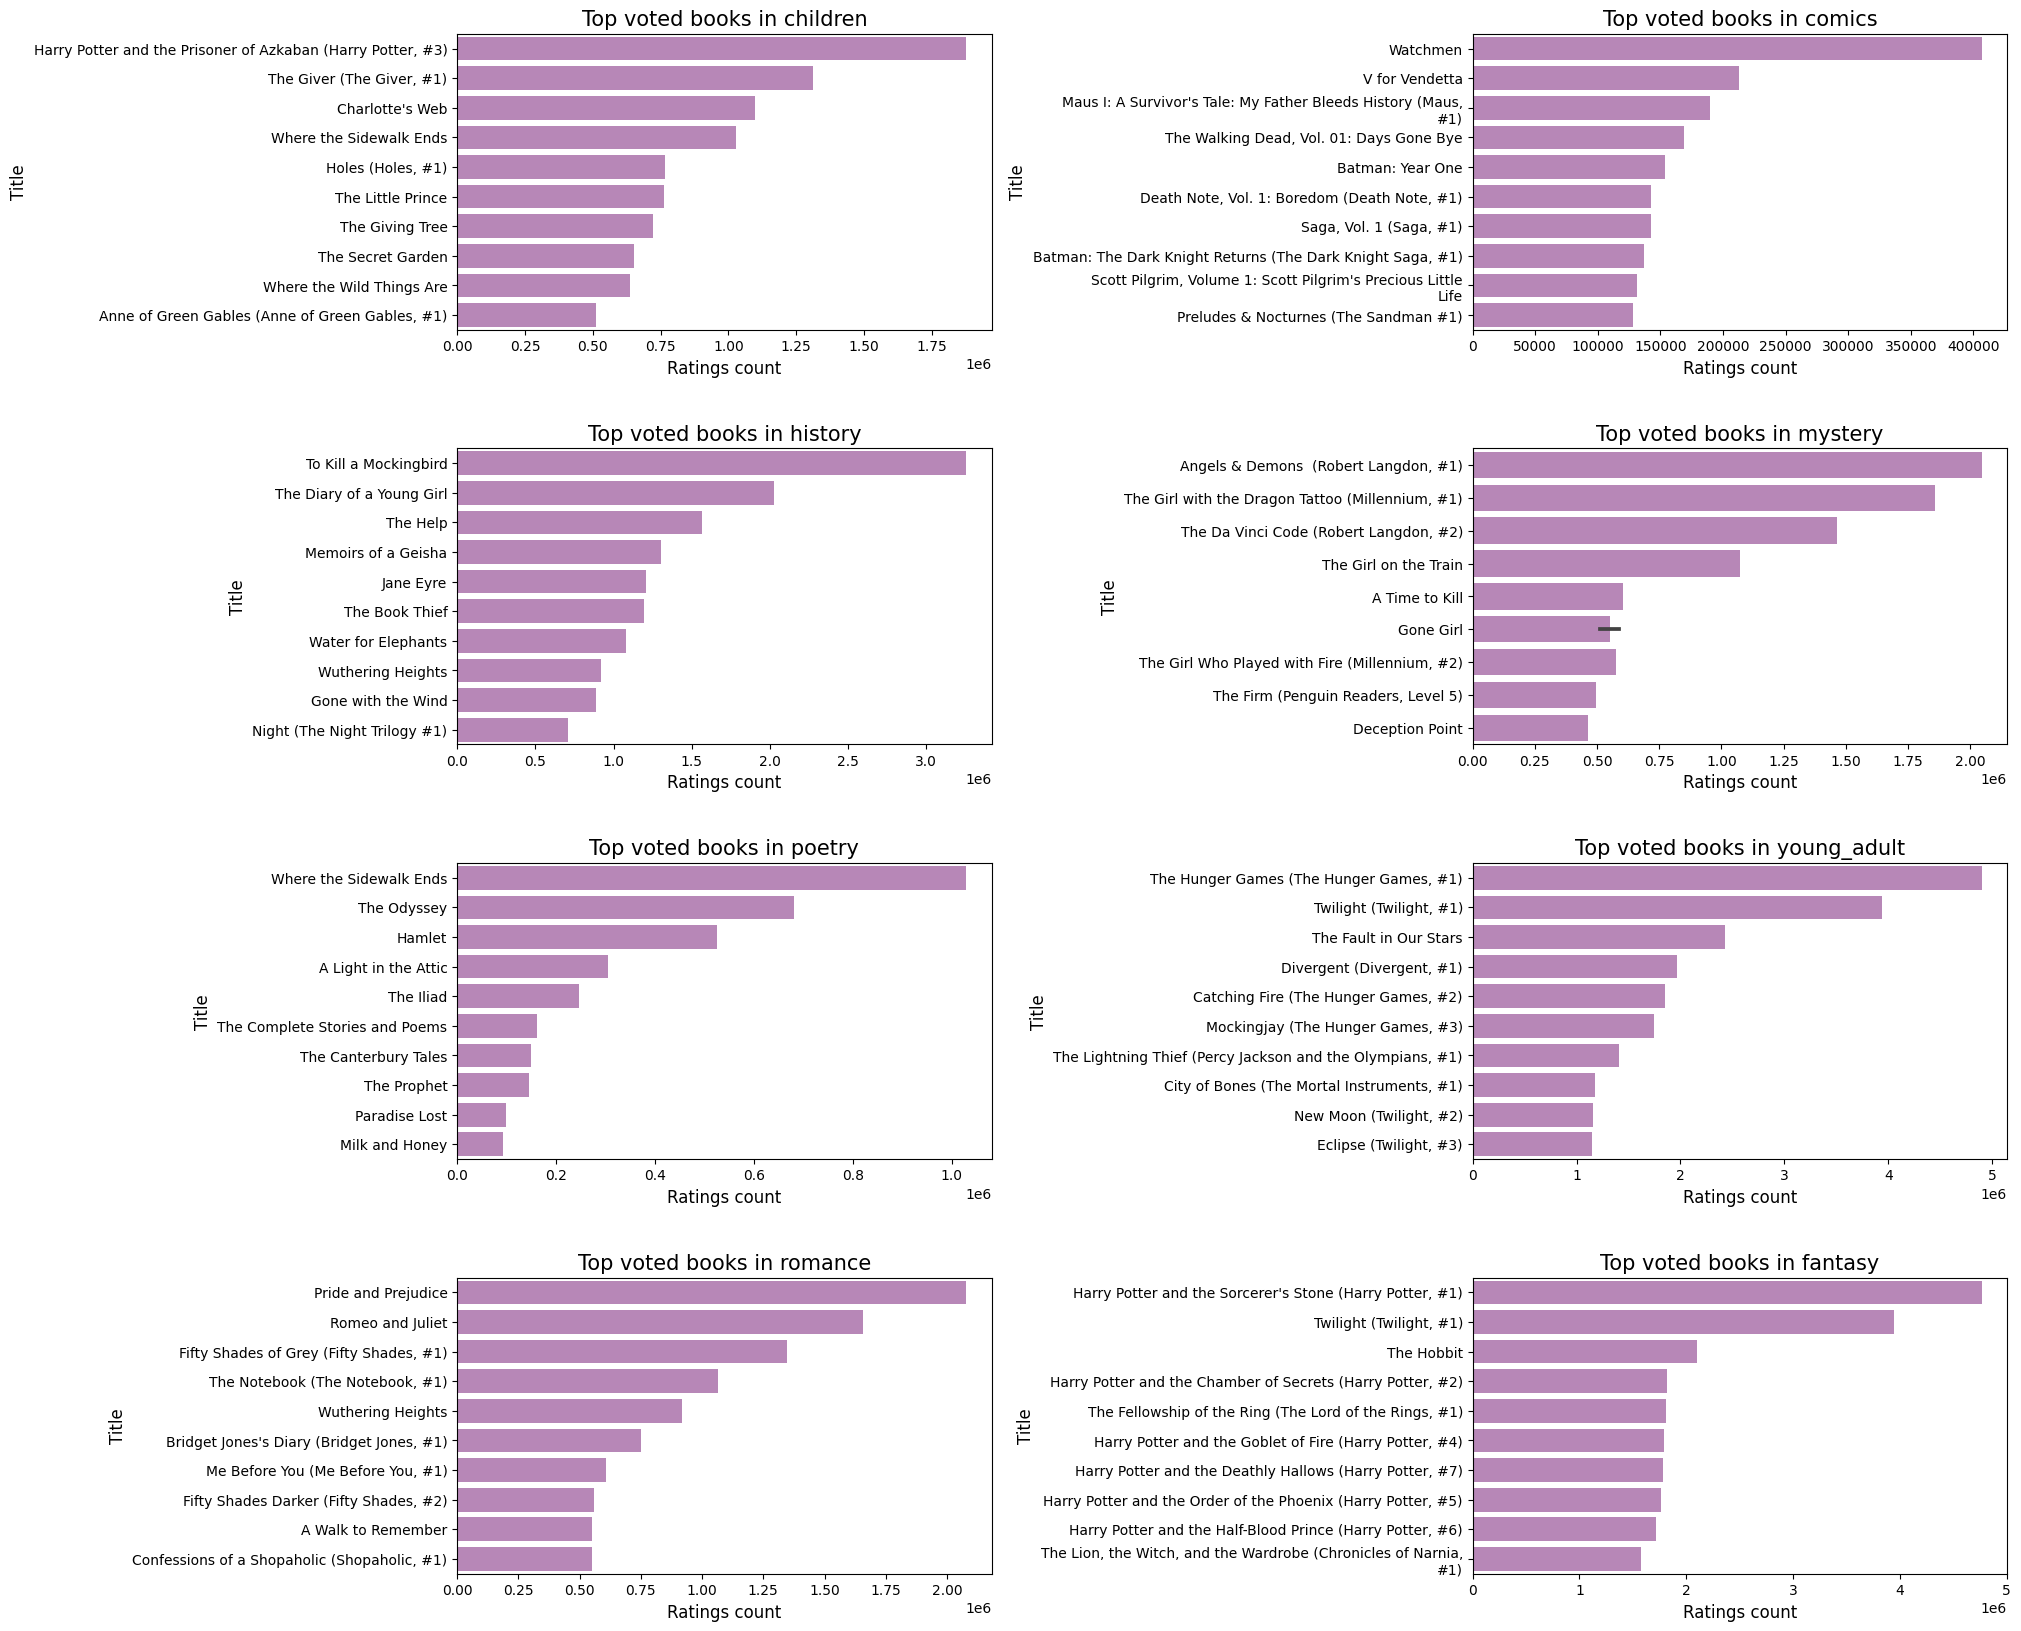

In [19]:
plot_top_vote_books(dfs)

In [20]:
all_top_voted_books = []
    
# Get the most voted books:
for df in dfs:
    top_vote = df.sort_values(by='ratings_count', ascending=False).head(1)
    all_top_voted_books.append(top_vote)
pd.concat(all_top_voted_books)[['genre','title']]

,genre,title
53726,children,Harry Potter and the Prisoner of Azkaban (Harr...
2749,comics,Watchmen
183265,history,To Kill a Mockingbird
204800,mystery,"Angels & Demons (Robert Langdon, #1)"
32205,poetry,Where the Sidewalk Ends
20364,young_adult,"The Hunger Games (The Hunger Games, #1)"
36171,romance,Pride and Prejudice
173961,fantasy,Harry Potter and the Sorcerer's Stone (Harry P...


### Author of most books

In [21]:
def plot_top_author(df_books):
    all_top_books = []

    # Get the authors whowrote the most books:
    for df in df_books:
        
        total_book = df.groupby(by=['author_name']).agg({'title': ['nunique']})
        total_book.columns = ['total_book']
        total_book.reset_index
        total_book = total_book.sort_values(by=['total_book'], ascending=False).head(10)
        
        all_top_books.append(total_book)

    '''Plots the top books'''
    rows = 4
    cols = 2
    
    f, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (20, 20))
    plt.subplots_adjust(hspace = 0.4, wspace = 0.5)
    
    count = 0
    for r in range(rows):
        for c in range(cols):
            kwargs = {'alpha':0.5}
            ax = sns.barplot(x = all_top_books[count]['total_book'], y = all_top_books[count].index, data = all_top_books[count], ax = axs[r,c], **kwargs, color='red')
            axs[r,c].set_title('Authors with most books in ' + df_books[count]['genre'].iloc[0], fontsize = 15)
            axs[r,c].set_xlabel('Amount of books', fontsize = 12) 
            axs[r,c].set_ylabel('Author Name', fontsize = 12) 

            count += 1
    plt.savefig(f"./resources/top_author_books.jpg", bbox_inches="tight")
    plt.show()

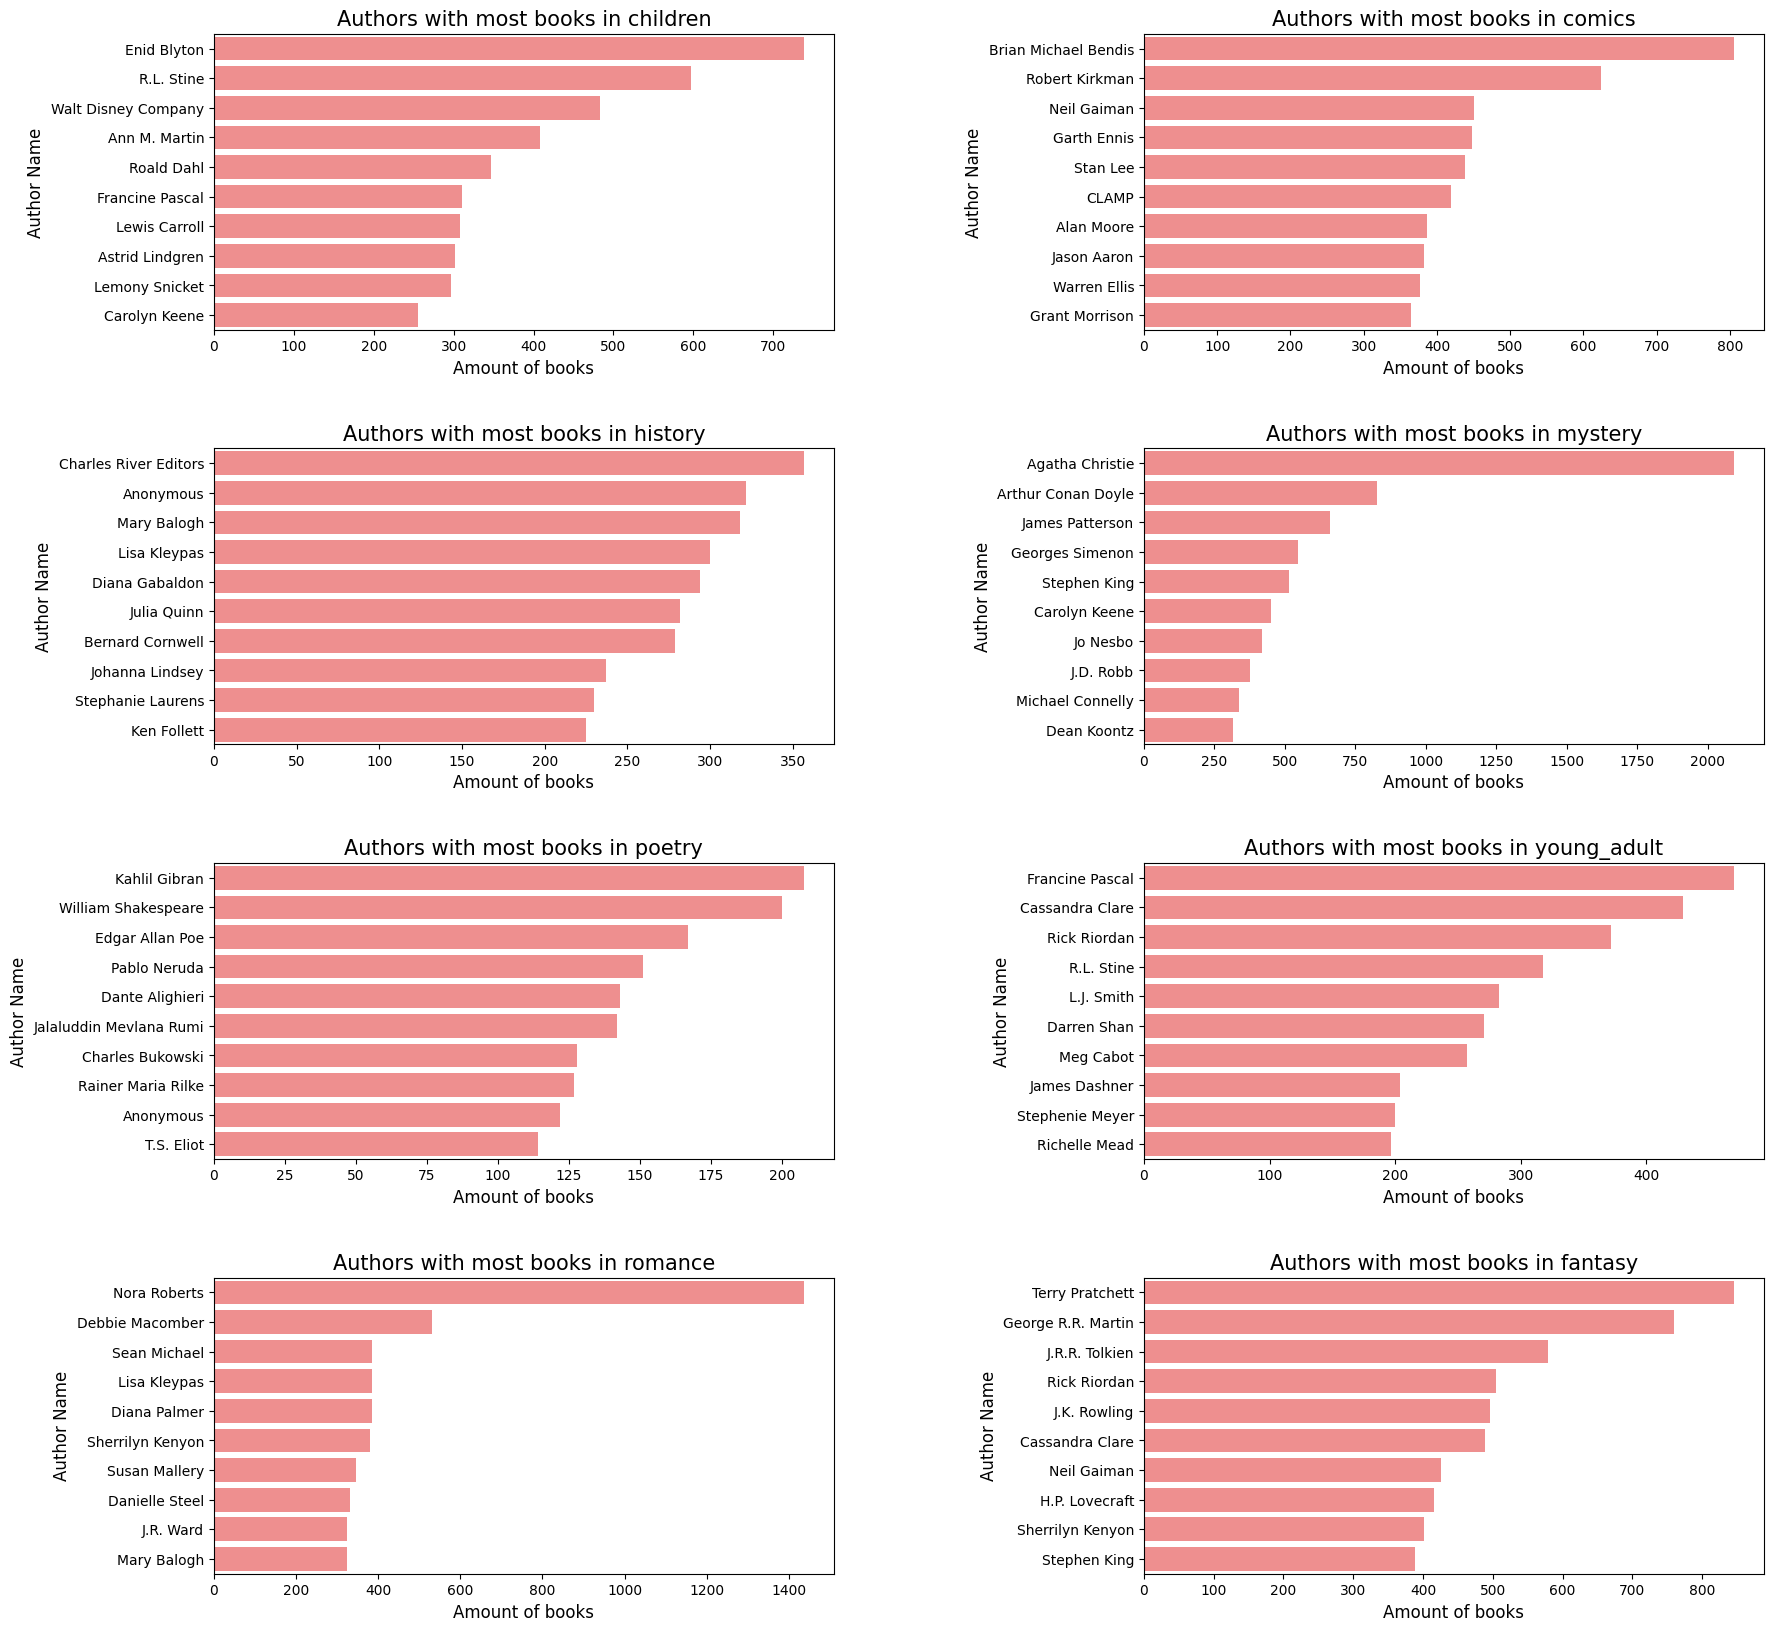

In [22]:
plot_top_author(dfs)

In [23]:
all_top_author_books = []
# Get the authors whowrote the most books:
for df in dfs:
        
    total_book = df.groupby(by=['author_name']).agg({'title': ['nunique']})
    total_book.columns = ['total_book']
    total_book.reset_index
    total_book = total_book.sort_values(by=['total_book'], ascending=False).head(1)
    all_top_author_books.append(total_book)
df = pd.concat(all_top_author_books)
df

,total_book
author_name,
Enid Blyton,739
Brian Michael Bendis,806
Charles River Editors,357
Agatha Christie,2094
Kahlil Gibran,208
Francine Pascal,470
Nora Roberts,1438
Terry Pratchett,846


Top rated Authors

In [24]:
def plot_top_rated_author(df_books):
    all_top_books = []

    # Get the most rated books:
    for df in df_books:
        top_author = df[df['average_rating'] > 4.0]
        top_author = top_author.groupby(by=['author_name']).agg({'average_rating': ['sum']})
        top_author.columns = ['total_rating']
        top_author.reset_index
        top_author = top_author.sort_values(by=['total_rating'], ascending=False).head(10)
        
        all_top_books.append(top_author)

    '''Plots the top books'''
    rows = 4
    cols = 2
    
    f, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (20, 20))
    plt.subplots_adjust(hspace = 0.4, wspace = 0.5)
    
    count = 0
    for r in range(rows):
        for c in range(cols):
            kwargs = {'alpha':0.5}
            ax = sns.barplot(x = all_top_books[count]['total_rating'], y = all_top_books[count].index, data = all_top_books[count], ax = axs[r,c], **kwargs, color='maroon')
            axs[r,c].set_title('Authors with most books in ' + df_books[count]['genre'].iloc[0], fontsize = 15)
            axs[r,c].set_xlabel('Total Rating', fontsize = 12) 
            axs[r,c].set_ylabel('Author Name', fontsize = 12) 
            count += 1
    plt.savefig(f"./resources/top_rated_author.jpg", bbox_inches="tight")
    plt.show()

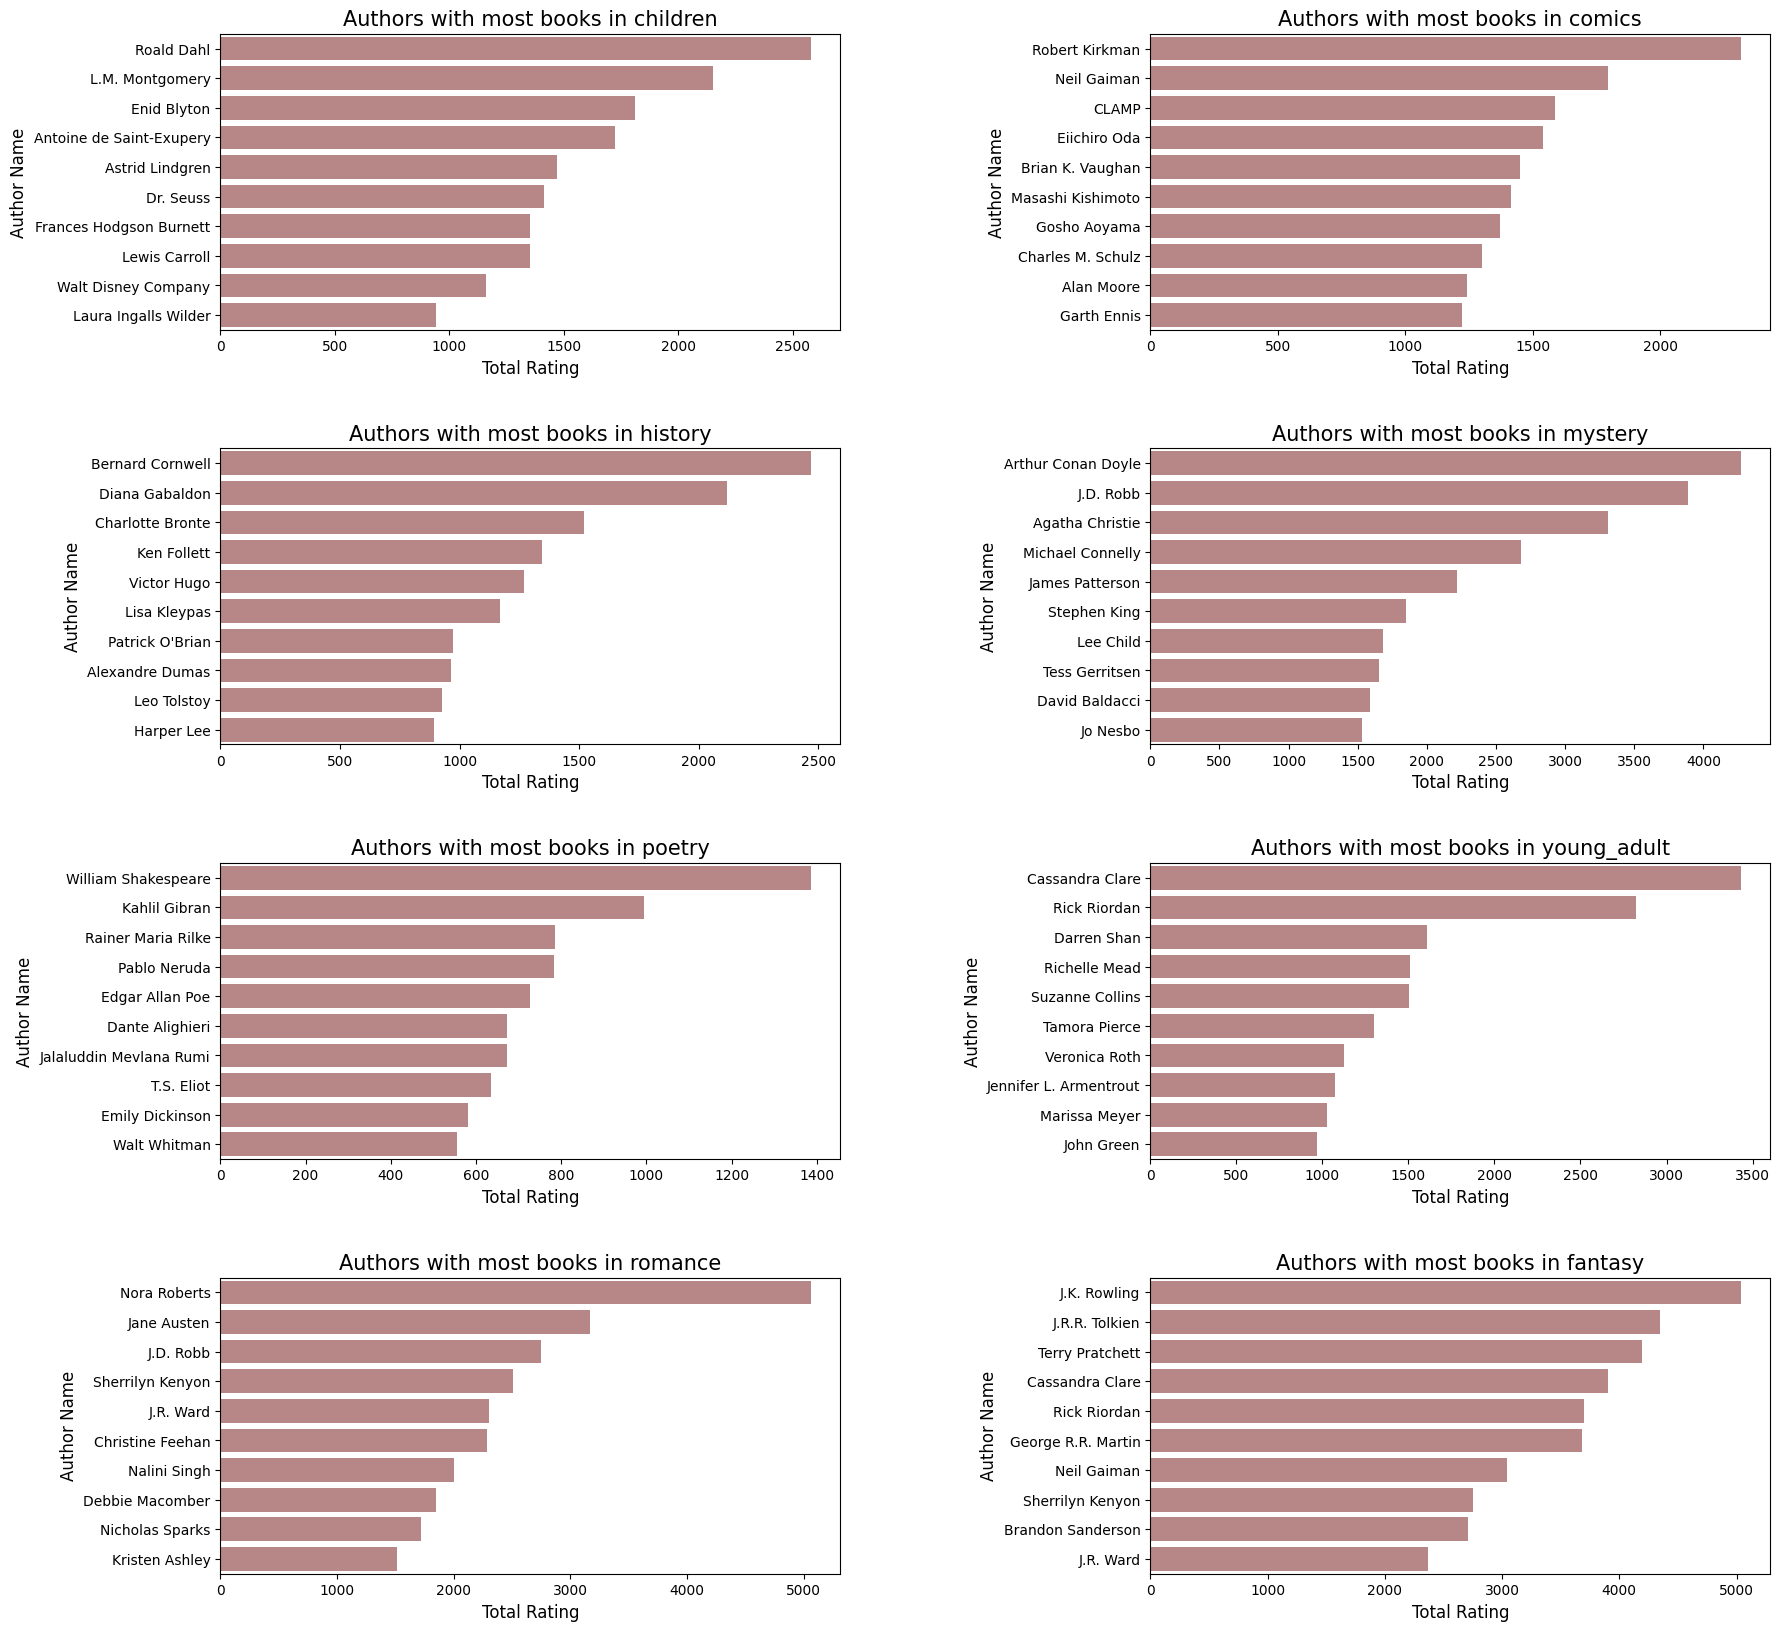

In [25]:
plot_top_rated_author(dfs)

In [26]:
all_top_authors = []

# Get the most rated authors:
for df in dfs:
    top_author = df[df['average_rating'] > 4.0]
    top_author = top_author.groupby(by=['author_name']).agg({'average_rating': ['sum']})
    top_author.columns = ['total_rating']
    top_author.reset_index
    top_author = top_author.sort_values(by=['total_rating'], ascending=False).head(1)
        
    all_top_authors.append(top_author)
df = pd.concat(all_top_authors)
df

,total_rating
author_name,
Roald Dahl,2577.56
Robert Kirkman,2316.04
Bernard Cornwell,2467.76
Arthur Conan Doyle,4270.32
William Shakespeare,1385.62
Cassandra Clare,3431.44
Nora Roberts,5060.45
J.K. Rowling,5036.04


Thickest books:

In [27]:
def plot_top_pages_books(df_books):
    all_top_books = []
    
    # Get the most rated books:
    for df in df_books:
        df['num_pages']=pd.to_numeric(df['num_pages'])
        top_pages = df.sort_values(by='num_pages', ascending = False).head(10)
        all_top_books.append(top_pages)

    '''Plots the top books'''
    rows = 3
    cols = 2
    
    f, axs = plt.subplots(nrows = rows, ncols = cols, figsize = (20, 20))
    plt.subplots_adjust(hspace = 0.4, wspace = 0.9)
    
    count = 0
    for r in range(rows):
        for c in range(cols):
            kwargs = {'alpha':0.5}
            ax = sns.barplot(x = all_top_books[count]["num_pages"], y = all_top_books[count]['title'], data = all_top_books[count], ax = axs[r,c], **kwargs, color='grey')
            axs[r,c].set_title('The most pages per book in ' + df_books[count]['genre'].iloc[0], fontsize = 15)
            axs[r,c].set_xlabel('Number of Pages', fontsize = 12) 
            axs[r,c].set_ylabel('Title', fontsize = 12) 

            labels = [textwrap.fill(label.get_text(), 60) for label in ax.get_yticklabels()]
            ax.set_yticklabels(labels)
             
            count += 1
    plt.savefig(f"./resources/top_pages_books.jpg", bbox_inches="tight")        
    plt.show();

/var/folders/5h/l2b3kn4j69bgsb2rqd8vqlw00000gn/T/ipykernel_17018/1786746240.py:30: UserWarning: Glyph 1728 (\N{ARABIC LETTER HEH WITH YEH ABOVE}) missing from current font.
  plt.savefig(f"./resources/top_pages_books.jpg", bbox_inches="tight")
/var/folders/5h/l2b3kn4j69bgsb2rqd8vqlw00000gn/T/ipykernel_17018/1786746240.py:30: UserWarning: Matplotlib currently does not support Arabic natively.
  plt.savefig(f"./resources/top_pages_books.jpg", bbox_inches="tight")
/var/folders/5h/l2b3kn4j69bgsb2rqd8vqlw00000gn/T/ipykernel_17018/1786746240.py:30: UserWarning: Glyph 1728 (\N{ARABIC LETTER HEH WITH YEH ABOVE}) missing from current font.
  plt.savefig(f"./resources/top_pages_books.jpg", bbox_inches="tight")
/var/folders/5h/l2b3kn4j69bgsb2rqd8vqlw00000gn/T/ipykernel_17018/1786746240.py:30: UserWarning: Matplotlib currently does not support Arabic natively.
  plt.savefig(f"./resources/top_pages_books.jpg", bbox_inches="tight")
/Users/nina/opt/anaconda3/envs/tflow2/lib/python3.10/site-packages/I

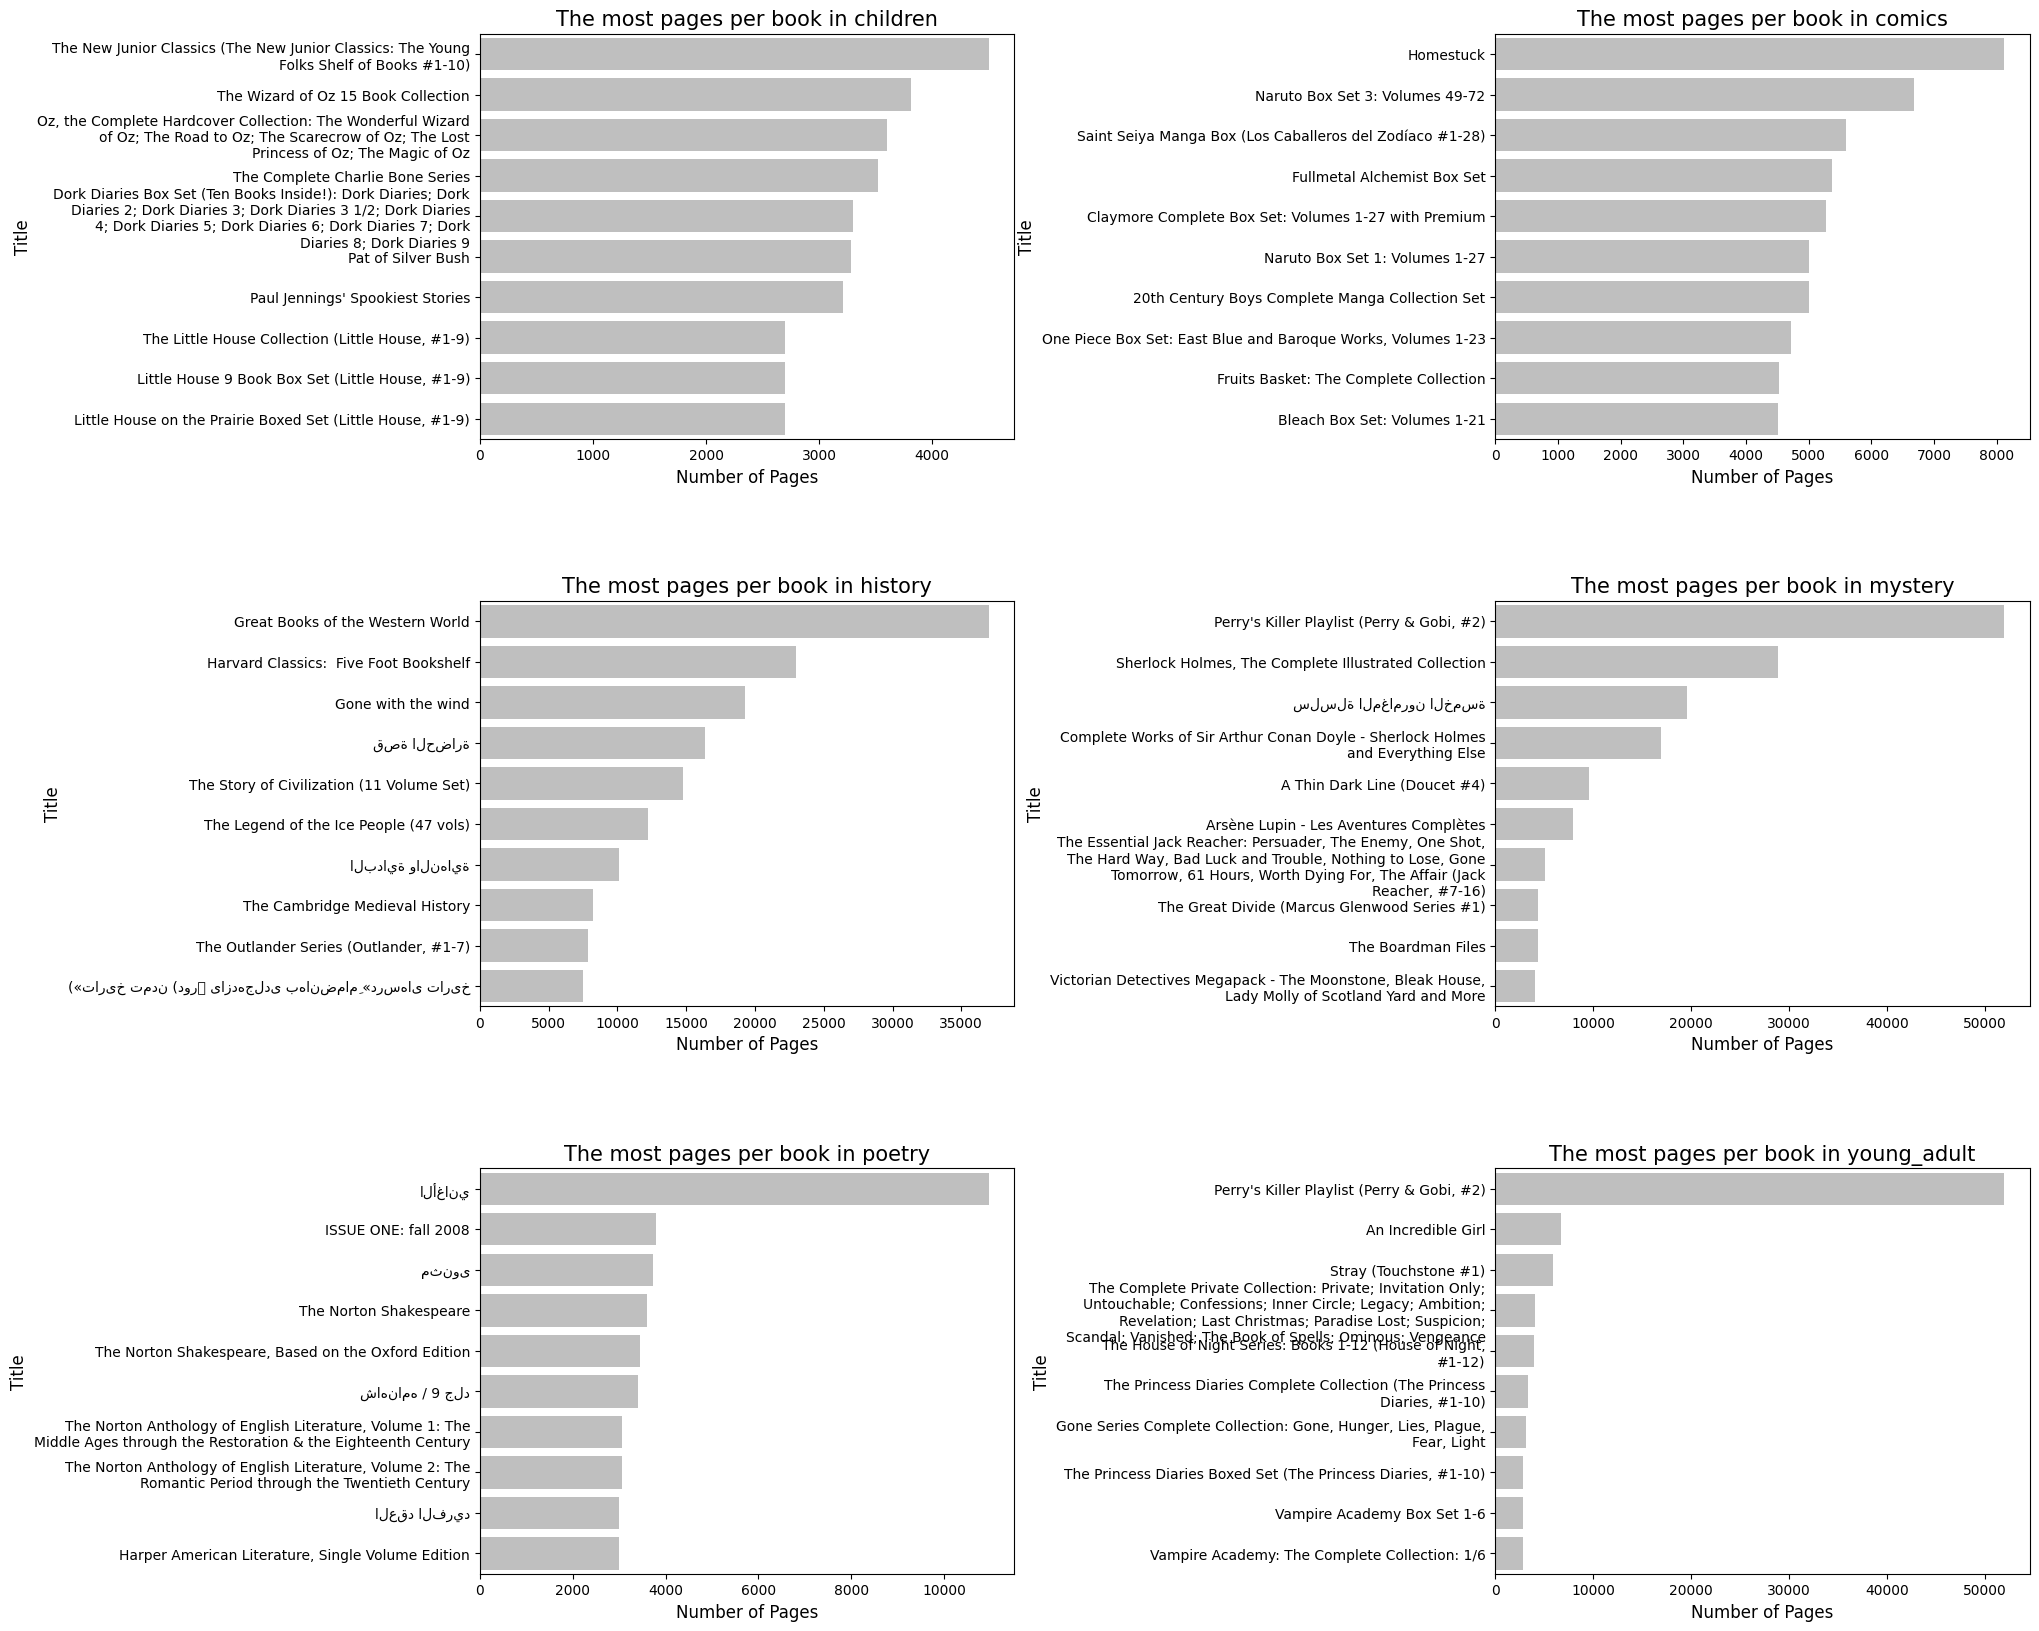

In [28]:
plot_top_pages_books(dfs)

In [30]:
all_top_pages_books = []
    
# Get the thickest books:
for df in dfs:
    df['num_pages'] = pd.to_numeric(df['num_pages'])
    top_pages = df.sort_values(by='num_pages', ascending = False).head(1)
    all_top_pages_books.append(top_pages)
pd.concat(all_top_pages_books)[['genre','title','num_pages']]

,genre,title,num_pages
34249,children,The New Junior Classics (The New Junior Classi...,4500.0
22591,comics,Homestuck,8124.0
242807,history,Great Books of the Western World,37000.0
71265,mystery,"Perry's Killer Playlist (Perry & Gobi, #2)",52015.0
8278,poetry,الأغاني,10960.0
30508,young_adult,"Perry's Killer Playlist (Perry & Gobi, #2)",52015.0
125708,romance,Rogue on the Rollaway,82000.0
96585,fantasy,Rogue on the Rollaway,82000.0


---

#### REVIEWS and RATINGS

In [31]:
# Read and drop unnecessary columns: 

children_rev = pd.read_json('./Dataset/goodreads_reviews_children.json', lines=True)
children_rev.drop(columns=['date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'], inplace=True)
children_rev.to_csv(path_or_buf='./Dataset/children_rev.csv', index = False)

comics_rev = pd.read_json('./Dataset/goodreads_reviews_comics_graphic.json', lines=True)
comics_rev.drop(columns=['date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'], inplace=True)
comics_rev.to_csv(path_or_buf='./Dataset/comics_rev.csv', index = False)

history_rev = pd.read_json('./Dataset/goodreads_reviews_history_biography.json', lines=True)
history_rev.drop(columns=['date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'], inplace=True)
history_rev.to_csv(path_or_buf='./Dataset/history_rev.csv', index = False)

mystery_rev = pd.read_json('./Dataset/goodreads_reviews_mystery_thriller_crime.json', lines=True)
mystery_rev.drop(columns=['date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'], inplace=True)
mystery_rev.to_csv(path_or_buf='./Dataset/mystery_rev.csv', index = False)

poetry_rev = pd.read_json('./Dataset/goodreads_reviews_poetry.json', lines=True)
poetry_rev.drop(columns=['date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'], inplace=True)
poetry_rev.to_csv(path_or_buf='./Dataset/poetry_rev.csv', index = False)

adult_rev = pd.read_json('./Dataset/goodreads_reviews_young_adult.json', lines=True)
adult_rev.drop(columns=['date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'], inplace=True)
adult_rev.to_csv(path_or_buf='./Dataset/adult_rev.csv', index = False)

fantasy_rev = pd.read_json('./Dataset/goodreads_reviews_fantasy_paranormal.json', lines=True)
fantasy_rev.drop(columns=['date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'], inplace=True)
fantasy_rev.to_csv(path_or_buf='./Dataset/fantasy_rev.csv', index = False)

romance_rev = pd.read_json('./Dataset/goodreads_reviews_romance.json', lines=True)
romance_rev.drop(columns=['date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'], inplace=True)
romance_rev.to_csv(path_or_buf='./Dataset/romance_rev.csv', index = False)